In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**step-1**
**Read the data**

In [9]:
tele_df=pd.read_csv(r"C:\Users\SAMEER\Documents\Naresh it\DataFiles\telecom_churn_data.csv")
tele_df.head(10)       

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0


**Step-2 Data Quick check** 

In [10]:
tele_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [11]:
tele_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [12]:
tele_df.isnull()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [13]:
tele_df.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

- It is a supervised learning problem 

- Supervised means learnng means the data has a Target column

- Here the data has target column : **churn**

- churn means the costemer stay with the company pr not stay with the company 

- Stay with the company represents wuth True or yes: 1

- NOt stay with the company represent with False or No : 0

- Tomorrow a New inpyt will come , our modek will say the churn is yes or no 

- It is a Classification problem 

- Means we are cassifynig the costomers

- we have one more type under the classification under supervised learning = supervised means , the data has in the target 

- Is regression problem 

- so it is kind of a forecasting 

- The output data is represents with the numbers, mostly continues data

- ex: predicting the ICICI bank share price

- EX : predicting the sales of a Company

- UCI Machine learning
 

In [14]:
tele_df.size

32000

In [15]:
tele_df.shape

(2000, 16)

**step-3  Convert categorical columns
Numerical columns names separately**

In [16]:
cat_columns=tele_df.select_dtypes(include='object').columns
num_columns=tele_df.select_dtypes(exclude='object').columns
num_columns

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

**Step-4: You need fill the missing values**

In [17]:
tele_df.isnull().sum()   

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [18]:
tele_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

- churn values 1.0 and 0.0

- byt it is a classification 

- now we need to change 1.0 to 1 and 0.0 to 0

- we need to fill missing values mode

- originally the data in the form of True and False Yes or no

- the company encoded the data given to you

In [19]:
tele_df['gender']=tele_df['gender'].fillna('male')
tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [20]:
mode_value=tele_df['gender'].mode()[0]
tele_df['gender']=tele_df['gender'].fillna(mode_value)
tele_df['gender']      

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
1995    Female
1996      Male
1997      male
1998      Male
1999      Male
Name: gender, Length: 2000, dtype: object

In [21]:
import numpy as  np

from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors=5)

tele_df['maximum_days_inactive']=ki.fit_transform(tele_df[['maximum_days_inactive']])
tele_df['maximum_days_inactive']=tele_df['maximum_days_inactive'].round().astype(int)
tele_df['maximum_days_inactive'] 

0       4
1       3
2       4
3       3
4       3
       ..
1995    4
1996    3
1997    5
1998    3
1999    3
Name: maximum_days_inactive, Length: 2000, dtype: int32

In [22]:
mode_value1=tele_df['churn'].mode()
tele_df['churn']=tele_df['churn'].fillna(mode_value1[0])
tele_df['churn']       

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    1.0
Name: churn, Length: 2000, dtype: float64

**Step-5: Categorical data analysis**

- Unique

- nunique

- counts

- bar chart

- count plot

- pie chart

In [23]:
tele_df['gender'].unique()

array(['Female', 'male', 'Male'], dtype=object)

In [24]:
tele_df['gender'].nunique()

3

In [25]:
tele_df['gender'].value_counts()

gender
Male      1053
Female     923
male        24
Name: count, dtype: int64

In [26]:
tele_df['churn'].astype('int')

0       0
1       0
2       1
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    1
Name: churn, Length: 2000, dtype: int32

In [27]:
tele_df[['gender']]

,gender
0,Female
1,Female
2,Female
3,Female
4,Female
...,...
1995,Female
1996,Male
1997,male
1998,Male


In [28]:
tele_df.select_dtypes(include='object').columns

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [29]:
tele_df.select_dtypes(exclude='object').columns

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [30]:
mode_gender=tele_df['gender'].mode()
tele_df['gender'].fillna(mode_gender[0],inplace=True) 

In [31]:
mode_gender=tele_df['maximum_days_inactive'].mode()
tele_df['maximum_days_inactive'].fillna(mode_gender[0],inplace=True) 

In [32]:
tele_df=pd.read_csv(r"C:\Users\SAMEER\Documents\Naresh it\DataFiles\telecom_churn_data.csv")
mode_gender=tele_df['gender'].mode()
tele_df['gender'].fillna(mode_gender[0],inplace=True) 
mode_gender=tele_df['maximum_days_inactive'].mode()
tele_df['maximum_days_inactive'].fillna(mode_gender[0],inplace=True) 
mode_value1=tele_df['churn'].mode()
tele_df['churn']=tele_df['churn'].fillna(mode_value1[0])

In [33]:
tele_df.isnull().sum()   

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [34]:
gender=tele_df['gender'].unique()
count=[]
for i in tele_df['gender'].unique():
    con=tele_df['gender']==i
    count.append(len(tele_df[con]))
cols='gender','Number of applicants'
gender_df=pd.DataFrame(zip(gender,count),columns=cols)
gender_df   

,gender,Number of applicants
0,Female,923
1,Male,1077


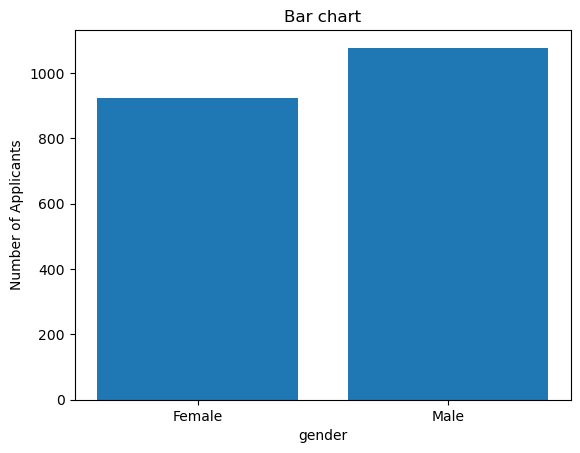

In [35]:
import matplotlib.pyplot as plt 
plt.bar('gender',
    'Number of applicants',
    data=gender_df)
plt.title("Bar chart")
plt.xlabel("gender")
plt.ylabel('Number of Applicants')
plt.savefig('gender_bar_chart_jpg')
plt.show()  

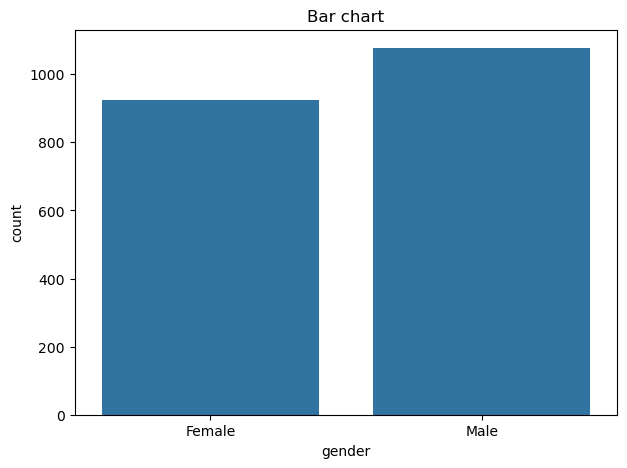

In [36]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.countplot(data=tele_df,
             x='gender')
             
plt.title('Bar chart')
plt.savefig('gender_bar_chart_jpg.png')
plt.show()

In [37]:
tele_df['gender'].value_counts()   

gender
Male      1077
Female     923
Name: count, dtype: int64

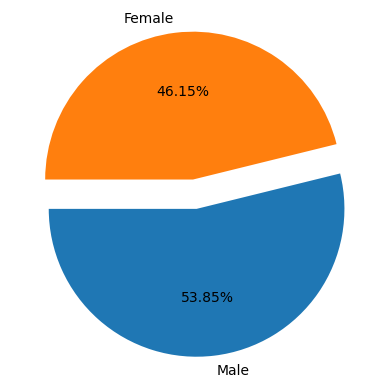

In [38]:
keys=tele_df['gender'].value_counts().keys()
values=tele_df['gender'].value_counts().values
plt.pie(values,
       explode=[0.1,0.1],
        labels=keys,
        autopct='%0.2f%%',
        radius=1,
        startangle=180)
plt.show()

**Step-6: Numerical data analysis**

- Describe function

- Histogram

- Data skew ness

In [39]:
tele_df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.247000,1.547000,0.131000
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.803937,1.315164,0.337485
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


(array([1., 0., 1.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

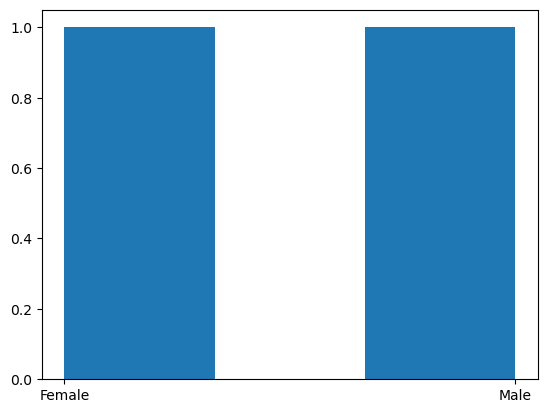

In [40]:
churn_data=tele_df['gender']
plt.hist(gender,bins=3)

3
4
<BarContainer object of 3 artists>


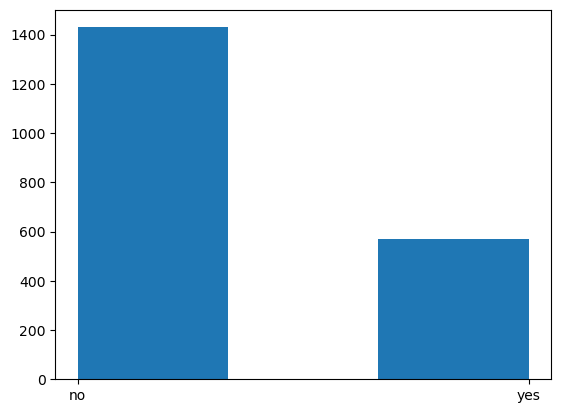

In [41]:
churn_data=tele_df['mail_subscribed']
count,bins,x=plt.hist(churn_data,bins=3)
print(len(count))
print(len(bins))
print(x)

In [42]:
import pandas as pd

# Example DataFrame
tele_df=pd.Series(np.random.normal(0, 1,1000))

skewness_value = tele_df.skew()

print(f"Skewness: {skewness_value}")

Skewness: -0.05024494402015151


**Step-7: Box plot creation
 Outlier analysis**

In [43]:
import pandas as pd 
tele_df=pd.read_csv(r"C:\Users\SAMEER\Documents\Naresh it\DataFiles\telecom_churn_data.csv")

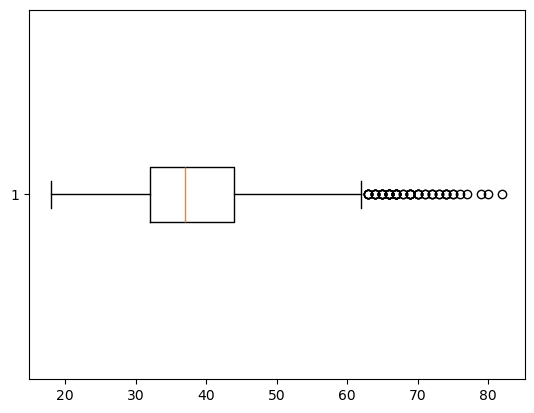

In [44]:
age=tele_df['age']
plt.boxplot(age,vert=False)
plt.show() 

**step-7 Outliers analysis**

In [45]:
age=tele_df['age']
q1=round(np.percentile(tele_df['age'],25),2)
q2=round(np.percentile(tele_df['age'],50),2)
q3=round(np.percentile(tele_df['age'],75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=age<lb
con2=age>ub
con3=con1 | con2
con3
outliers_data=age[con3]
outliers_data    

2       65
30      63
71      67
87      64
154     66
        ..
1852    65
1855    72
1884    69
1970    67
1981    70
Name: age, Length: 63, dtype: int64

In [46]:
outliers_df=tele_df[con3]
outliers_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
30,2015,111252,410-9633,Female,63,106,no,no,280.65,11.0,31.81,81,3,NaN,1,0.0
71,2015,124837,413-2241,Male,67,163,no,no,371.55,9.6,42.11,82,7,3.0,0,1.0
87,2015,131070,334-9182,Male,64,21,no,yes,199.05,12.9,22.56,78,7,4.0,3,0.0
154,2015,165319,403-9733,Female,66,68,no,no,223.20,12.1,25.30,103,3,NaN,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,2015,933978,363-1560,Male,65,58,no,no,352.20,9.9,39.92,122,6,3.0,0,0.0
1855,2015,936502,350-1354,Female,72,143,no,no,304.20,4.6,34.48,71,4,2.0,1,0.0
1884,2015,950907,412-2520,Male,69,73,no,yes,123.45,11.8,13.99,98,2,4.0,6,1.0
1970,2015,985734,375-8238,Female,67,144,yes,no,225.00,9.4,25.50,121,15,3.0,0,0.0


In [47]:
age=tele_df['age']
q1=np.percentile(tele_df['age'],25)
q2=np.percentile(tele_df['age'],50)
q3=np.percentile(tele_df['age'],75)
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=age>lb
con2=age<ub
con3=con1 | con2
con3
non_outliers_data=age[con3]
non_outliers_data

0       36
1       39
2       65
3       24
4       40
        ..
1995    54
1996    45
1997    53
1998    40
1999    37
Name: age, Length: 2000, dtype: int64

In [49]:
non_outliers_df=tele_df[con3]
non_outliers_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


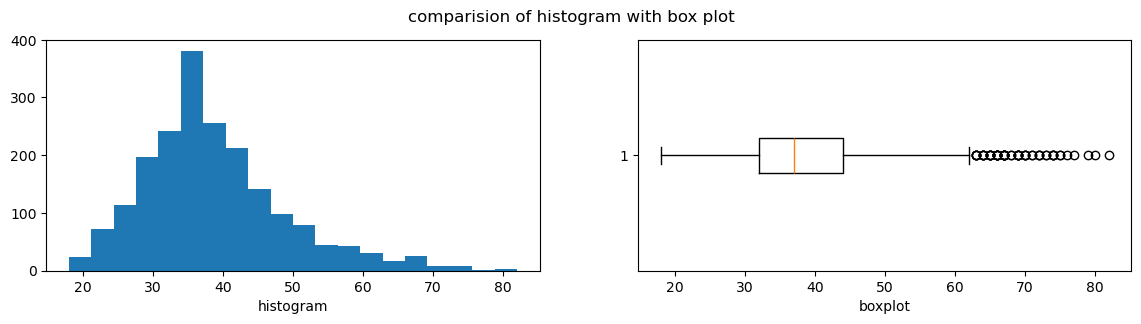

In [44]:
age_non_outliers=non_outliers_df['age']
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram with box plot')
plt.subplot(1,2,1).hist(age_non_outliers,bins=20)
plt.xlabel('histogram')
plt.subplot(1,2,2).boxplot(age_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

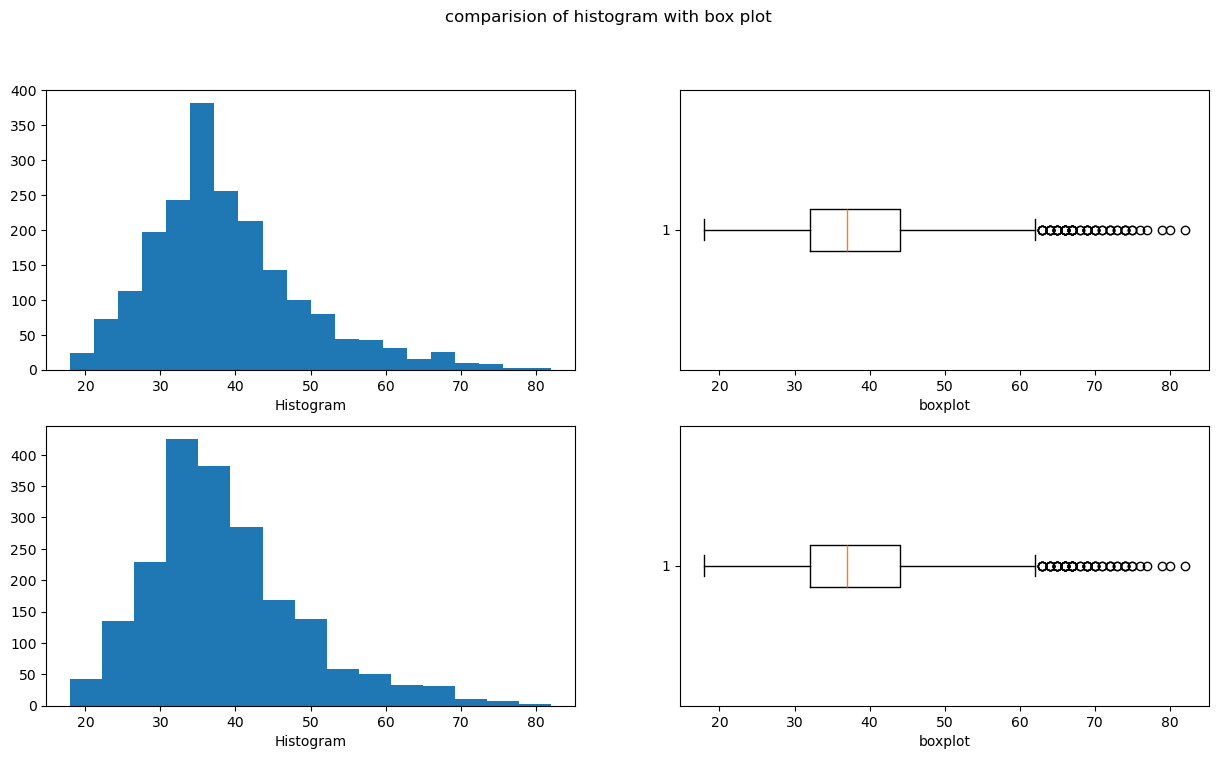

In [46]:
age_non_outliers=non_outliers_df['age']
age=tele_df['age']
#######################################
plt.figure(figsize=(15,8))
plt.suptitle('comparision of histogram with box plot')
plt.subplot(2,2,1).hist(age_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(age_non_outliers,vert=False)
plt.xlabel('boxplot')
####################################################################
plt.subplot(2,2,3).hist(age,bins=15)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(age,vert=False)
plt.xlabel('boxplot')
plt.show()

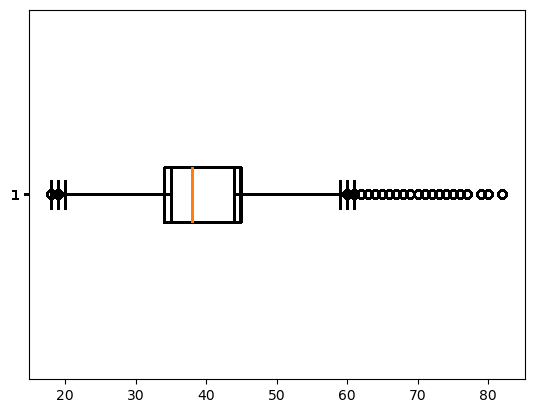

In [47]:
age=tele_df['age']
q1=np.percentile(tele_df['age'],25)
q2=np.percentile(tele_df['age'],50)
q3=np.percentile(tele_df['age'],50)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3-1.5*IQR
con1=age<lb
con2=age>ub
con3= con1 | con2
con3
# Bitwise operators used to compare 
# Bits data ==== 0 and 1 == True False
outliers_data=age[con3]
outliers_data
median=outliers_data.median()
for i in outliers_data:
    a=outliers_data.replace(i,median)
    plt.boxplot(a,vert=False)

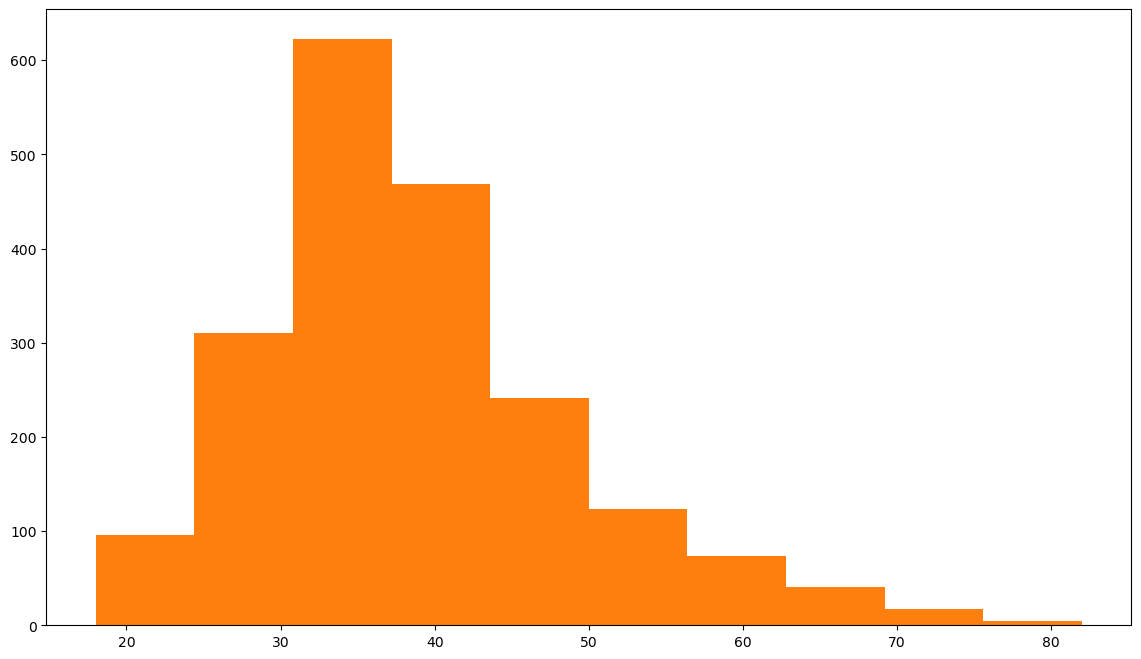

In [50]:
age_non_outliers=non_outliers_df['age']
age=tele_df['age']
plt.figure(figsize=(14,8))
plt.hist(age) 
plt.hist(age_non_outliers)
plt.show() 

**Step-8: Transformation methods**

In [52]:
exp_data=np.random.exponential(size=1000)
exp_data

array([3.71009518e+00, 1.20481257e+00, 1.00699252e-01, 1.93401971e+00,
       6.79219600e-02, 2.34419766e-01, 6.55217644e-01, 1.89101307e-01,
       8.25169677e-02, 5.02863628e-01, 1.81534544e+00, 3.13380295e-01,
       2.41085588e-01, 1.70885547e-01, 1.31767724e+00, 1.97961824e+00,
       3.67300382e-01, 1.83759128e+00, 1.92912247e-01, 2.40217221e-01,
       4.02225768e-01, 3.92899217e-01, 2.83939044e-01, 8.67617012e-01,
       1.17322892e+00, 2.39554583e+00, 1.15219208e+00, 4.36794427e-02,
       2.55617774e-01, 5.95054170e-01, 9.03540220e-01, 1.79065788e-01,
       1.05414907e+00, 1.29982430e+00, 8.53993314e-01, 1.62449824e+00,
       1.46634769e+00, 2.35290893e-01, 9.80772029e-01, 2.21081089e+00,
       1.13473154e+00, 7.09390790e-02, 2.04777496e+00, 2.95244621e+00,
       5.52901213e-01, 2.46879337e+00, 1.71711972e+00, 4.46687606e+00,
       2.14831140e-01, 1.61901815e-01, 5.89280496e-01, 6.34652826e-01,
       8.96338916e-02, 4.09152562e-01, 9.19367843e-01, 9.73082978e-01,
      

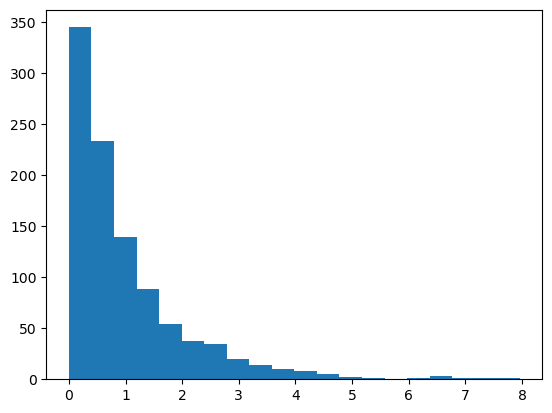

In [53]:
plt.hist(exp_data,bins=20)
plt.show()

In [58]:
normal_data=np.random.normal(size=500)
normal_data

array([ 9.80174456e-01,  7.02073056e-01, -1.12385892e+00,  1.54272305e+00,
        7.42928299e-02, -4.18040601e-01, -9.27580417e-01,  9.26323717e-01,
       -7.08204298e-01,  1.00485409e+00, -1.59270966e+00,  6.60954487e-01,
        5.55807182e-01,  5.88667051e-02,  1.07203225e+00, -2.71609525e-01,
        2.12641652e-03,  1.08916250e+00, -1.48808693e+00,  2.93448813e-01,
       -1.36965386e+00, -4.37222932e-01, -2.54235024e+00,  1.36350162e+00,
        3.06599075e-01, -1.50020303e+00, -3.70171171e-01, -9.30942582e-01,
       -8.63872766e-01, -6.85025163e-01, -1.14870258e+00, -5.63637807e-01,
       -8.94572845e-01,  1.03489899e+00, -3.97149968e-01,  1.59830566e+00,
       -9.71510980e-01, -7.39688663e-01, -1.12197193e+00, -2.27068098e+00,
       -6.11621072e-01,  1.59919095e-01,  5.68563071e-01,  4.71807571e-02,
        5.47722871e-01,  2.19045613e+00,  1.19718907e+00,  3.01548750e-01,
       -1.13838482e+00,  9.93187972e-01, -6.93612852e-01,  8.82832416e-01,
       -2.00383959e-01, -

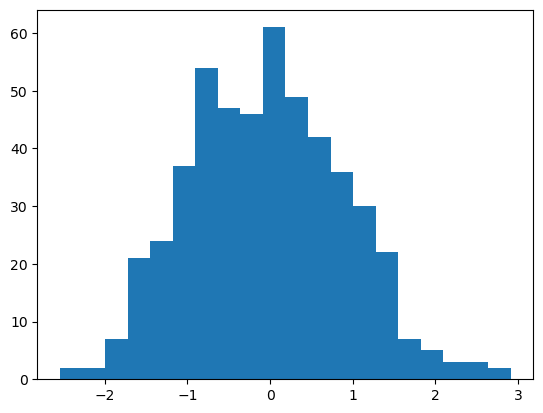

In [62]:
plt.hist(normal_data,bins=20)
plt.show()

 **Step-9: Encoding methods**

- map

- np.where

- LabelEncoder

- onehot encoder**

**Step-10: Scaling methods
 Z
 minmax scalar**

In [63]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
transform_age=pt.fit_transform(tele_df['age'].values.reshape(-1,1))
transform_age

array([[-0.12838596],
       [ 0.18786111],
       [ 2.07754042],
       ...,
       [ 1.34882454],
       [ 0.28673627],
       [-0.0195074 ]])

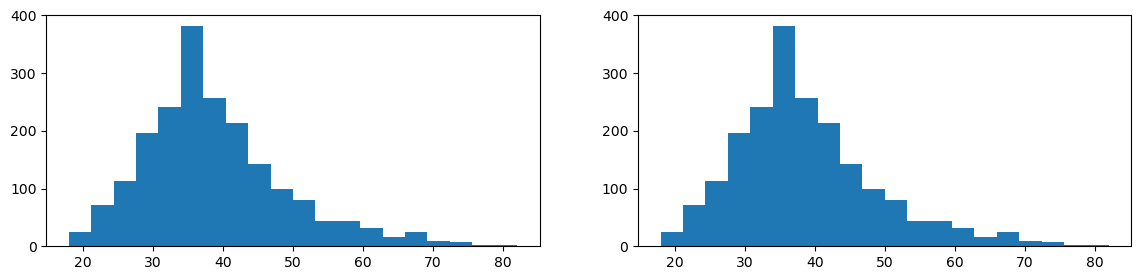

In [67]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(tele_df['age'],bins=20)
plt.subplot(1,2,2).hist(tele_df['age'],bins=20)
plt.show()

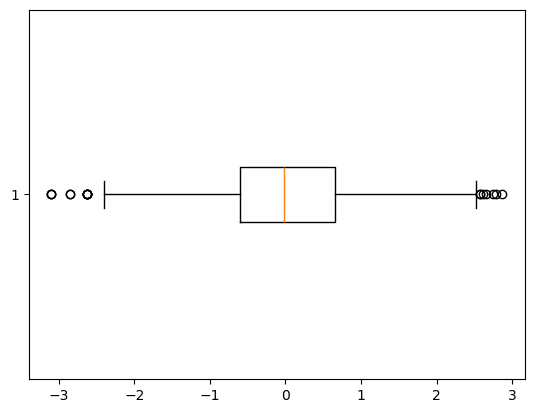

In [68]:
plt.boxplot(transform_age,vert=False)
plt.show()

**Step-9: Encoding methods**

In [69]:
tele_df['gender'].unique()

array(['Female', nan, 'Male'], dtype=object)

In [71]:
 d={'Female':0,'Male':1}
 tele_df['gender']=tele_df['gender'].map(d)
 tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0.0,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,0.0,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,0.0,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,0.0,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,0.0,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,0.0,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,1.0,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,1.0,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [73]:
 unique_labels=sorted(tele_df['gender'].unique())
 list1=[i for i in range(len(unique_labels))]
 dict1=dict(zip(unique_labels,list1))
 dict1
 tele_df['gender_new']=tele_df['gender'].map(dict1)
 tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_new
0,2015,100198,409-8743,0.0,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0,0
1,2015,100643,340-5930,0.0,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0,0
2,2015,100756,372-3750,0.0,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0,0
3,2015,101595,331-4902,0.0,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0,0
4,2015,101653,351-8398,0.0,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,0.0,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN,0
1996,2015,998086,383-9255,1.0,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0,2
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0,1
1998,2015,998934,359-7788,1.0,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0,2


In [75]:
for i in cat_columns:
     unique_labels=sorted(tele_df[i].unique())
     list1=[i for i in range(len(unique_labels))]
     dict1=dict(zip(unique_labels,list1))
     dict1
     tele_df[i]=tele_df[i].map(dict1)
tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_new
0,2015,100198,1754,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0,0
1,2015,100643,299,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0,0
2,2015,100756,957,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0,0
3,2015,101595,75,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0,0
4,2015,101653,517,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,1224,0,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,NaN,0
1996,2015,998086,1188,2,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0,2
1997,2015,998474,553,1,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0,1
1998,2015,998934,706,2,40,94,0,0,178.05,10.4,20.18,100,6,NaN,3,0.0,2


 **LabelEncoder**

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tele_df['gender']=le.fit_transform(tele_df['gender'])
tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_new
0,2015,100198,1754,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0,0
1,2015,100643,299,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0,0
2,2015,100756,957,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0,0
3,2015,101595,75,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0,0
4,2015,101653,517,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,1224,0,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,NaN,0
1996,2015,998086,1188,2,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0,2
1997,2015,998474,553,1,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0,1
1998,2015,998934,706,2,40,94,0,0,178.05,10.4,20.18,100,6,NaN,3,0.0,2


In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_columns:
    tele_df[i]=le.fit_transform(tele_df[i])
tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_new
0,2015,100198,1754,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0,0
1,2015,100643,299,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0,0
2,2015,100756,957,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0,0
3,2015,101595,75,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0,0
4,2015,101653,517,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,1224,0,54,75,0,1,182.25,11.3,20.66,97,5,4.0,2,NaN,0
1996,2015,998086,1188,2,45,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0,2
1997,2015,998474,553,1,53,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0,1
1998,2015,998934,706,2,40,94,0,0,178.05,10.4,20.18,100,6,NaN,3,0.0,2


 **np.where**

In [86]:
tele_df=pd.read_csv(r"C:\Users\SAMEER\Documents\Naresh it\DataFiles\telecom_churn_data.csv")
con=tele_df['gender']=='Female'
tele_df['gender']=np.where(con,0,1)
tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,0,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,0,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,0,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,0,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,0,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,1,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,1,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,1,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


**one hot encoder**

In [87]:
df=pd.get_dummies(tele_df['gender'],dtype='int')
df['gender']=tele_df['gender'].values
df

,0,1,gender
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1995,1,0,0
1996,0,1,1
1997,0,1,1
1998,0,1,1


In [89]:
df=pd.get_dummies(tele_df['gender'],dtype='int')
df['gender']=tele_df['gender'].values
df['dummy']=[i for i in range(len(tele_df))]
df

,0,1,gender,dummy
0,1,0,0,0
1,1,0,0,1
2,1,0,0,2
3,1,0,0,3
4,1,0,0,4
...,...,...,...,...
1995,1,0,0,1995
1996,0,1,1,1996
1997,0,1,1,1997
1998,0,1,1,1998


In [91]:
df1=pd.get_dummies(tele_df['gender'],dtype='int')
df1

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1995,1,0
1996,0,1
1997,0,1
1998,0,1


In [92]:
 df2=tele_df[['gender']]
 df2
 

,gender
0,0
1,0
2,0
3,0
4,0
...,...
1995,0
1996,1
1997,1
1998,1


In [93]:
df3=df1.join(df2)
df3

,0,1,gender
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1995,1,0,0
1996,0,1,1
1997,0,1,1
1998,0,1,1


In [94]:
pd.concat([df1,df2],axis=1)

,0,1,gender
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1995,1,0,0
1996,0,1,1
1997,0,1,1
1998,0,1,1


In [95]:
pd.get_dummies(tele_df,dtype='int')


,year,customer_id,gender,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,...,phone_no_422-5874,phone_no_422-6685,phone_no_422-6690,phone_no_422-7728,phone_no_422-8268,phone_no_422-9964,multi_screen_no,multi_screen_yes,mail_subscribed_no,mail_subscribed_yes
0,2015,100198,0,36,62,148.35,12.2,16.81,82,1,...,0,0,0,0,0,0,1,0,1,0
1,2015,100643,0,39,149,294.45,7.7,33.37,87,3,...,0,0,0,0,0,0,1,0,1,0
2,2015,100756,0,65,126,87.30,11.9,9.89,91,1,...,0,0,0,0,0,0,1,0,1,0
3,2015,101595,0,24,131,321.30,9.5,36.41,102,4,...,0,0,0,0,0,0,1,0,0,1
4,2015,101653,0,40,191,243.00,10.9,27.54,83,7,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,0,54,75,182.25,11.3,20.66,97,5,...,0,0,0,0,0,0,1,0,0,1
1996,2015,998086,1,45,127,273.45,9.3,30.99,116,3,...,0,0,0,0,0,0,1,0,1,0
1997,2015,998474,1,53,94,128.85,15.6,14.60,110,16,...,0,0,0,0,0,0,1,0,1,0
1998,2015,998934,1,40,94,178.05,10.4,20.18,100,6,...,0,0,0,0,0,0,1,0,1,0


In [97]:
for i in cat_columns:
    print(tele_df[i].unique(),tele_df[i].nunique())

['409-8743' '340-5930' '372-3750' ... '353-2080' '359-7788' '414-1496'] 2000
[0 1] 2
['no' 'yes'] 2
['no' 'yes'] 2


**Step-10: Scaling methods**

**z score**

**z=x-u/sigma**

In [98]:
age_data=tele_df['age']
age_mean=tele_df['age'].mean()
age_std=tele_df['age'].std()
nr=age_data-age_mean
z_scaled_age_data=nr/age_std
z_scaled_age_data

0      -0.263609
1       0.030324
2       2.577743
3      -1.439341
4       0.128302
          ...   
1995    1.499989
1996    0.618190
1997    1.402011
1998    0.128302
1999   -0.165631
Name: age, Length: 2000, dtype: float64

In [99]:
age_data=tele_df['age']
age_mean=tele_df['age'].mean()
age_std=tele_df['age'].std()
nr=age_data-age_mean
z_scaled_age_data=nr/age_std
z_scaled_age_data
tele_df['z_scaled_age_data']=z_scaled_age_data

In [100]:
tele_df[['age','z_scaled_age_data']]

,age,z_scaled_age_data
0,36,-0.263609
1,39,0.030324
2,65,2.577743
3,24,-1.439341
4,40,0.128302
...,...,...
1995,54,1.499989
1996,45,0.618190
1997,53,1.402011
1998,40,0.128302


**x scaled = (x-xmin)/(xmax-xmin)**

In [103]:
age_data=tele_df['age']
age_min=tele_df['age'].min()
age_max=tele_df['age'].max()
nr=age_data-age_min
dr=age_max-age_min
x_scaled_age_data=nr/dr
x_scaled_age_data
tele_df['x_scaled_age_data']=x_scaled_age_data

In [104]:
tele_df[['age','x_scaled_age_data']]

,age,x_scaled_age_data
0,36,0.281250
1,39,0.328125
2,65,0.734375
3,24,0.093750
4,40,0.343750
...,...,...
1995,54,0.562500
1996,45,0.421875
1997,53,0.546875
1998,40,0.343750


In [106]:
max_id_age=tele_df[['age']].idxmax().values[0]
min_id_age=tele_df[['age']].idxmin().values[0]
print('The maximum value id is:',max_id_age)
print('The minimum value id is:',min_id_age)

The maximum value id is: 682
The minimum value id is: 921


In [107]:
tele_df[['age']].max()

age    82
dtype: int64

In [108]:
tele_df[['age']].min()

age    18
dtype: int64

In [109]:
tele_df[['age']].loc[[max_id_age,min_id_age]]

,age
682,82
921,18


In [110]:
 max_id_age=tele_df[['z_scaled_age_data']].idxmax().values[0]
 min_id_age=tele_df[['z_scaled_age_data']].idxmin().values[0]
 print('The maximum value id is:',max_id_age)
 print('The minimum value id is:',min_id_age)
 tele_df[['z_scaled_age_data']].loc[[max_id_age,min_id_age]]

The maximum value id is: 682
The minimum value id is: 921


,z_scaled_age_data
682,4.243363
921,-2.027207


In [111]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
tele_df['ss_age_data']=ss.fit_transform(tele_df[['age']])
tele_df['ss_age_data']

0      -0.263675
1       0.030332
2       2.578388
3      -1.439701
4       0.128334
          ...   
1995    1.500364
1996    0.618345
1997    1.402362
1998    0.128334
1999   -0.165673
Name: ss_age_data, Length: 2000, dtype: float64

In [112]:
tele_df[['age','z_scaled_age_data','ss_age_data']]

,age,z_scaled_age_data,ss_age_data
0,36,-0.263609,-0.263675
1,39,0.030324,0.030332
2,65,2.577743,2.578388
3,24,-1.439341,-1.439701
4,40,0.128302,0.128334
...,...,...,...
1995,54,1.499989,1.500364
1996,45,0.618190,0.618345
1997,53,1.402011,1.402362
1998,40,0.128302,0.128334


In [113]:
age_data=tele_df['age']
age_min=tele_df['age'].min()
age_max=tele_df['age'].max()
nr=age_data-age_min
dr=age_max-age_min
x_scaled_age_data=nr/dr
x_scaled_age_data
tele_df['x_scaled_age_data']=x_scaled_age_data

In [115]:
tele_df[['age','x_scaled_age_data','ss_age_data']]

,age,x_scaled_age_data,ss_age_data
0,36,0.281250,-0.263675
1,39,0.328125,0.030332
2,65,0.734375,2.578388
3,24,0.093750,-1.439701
4,40,0.343750,0.128334
...,...,...,...
1995,54,0.562500,1.500364
1996,45,0.421875,0.618345
1997,53,0.546875,1.402362
1998,40,0.343750,0.128334


In [118]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
tele_df['mm_age_data']=mm.fit_transform(tele_df[['age']])
tele_df['mm_age_data']

0       0.281250
1       0.328125
2       0.734375
3       0.093750
4       0.343750
          ...   
1995    0.562500
1996    0.421875
1997    0.546875
1998    0.343750
1999    0.296875
Name: mm_age_data, Length: 2000, dtype: float64

In [119]:
tele_df[['age','x_scaled_age_data','mm_age_data']]

,age,x_scaled_age_data,mm_age_data
0,36,0.281250,0.281250
1,39,0.328125,0.328125
2,65,0.734375,0.734375
3,24,0.093750,0.093750
4,40,0.343750,0.343750
...,...,...,...
1995,54,0.562500,0.562500
1996,45,0.421875,0.421875
1997,53,0.546875,0.546875
1998,40,0.343750,0.343750


In [120]:
 ss.fit_transform(tele_df[['age']])

array([[-0.26367479],
       [ 0.03033167],
       [ 2.57838761],
       ...,
       [ 1.40236179],
       [ 0.12833382],
       [-0.16567264]])

In [121]:
d=tele_df['age'].values.reshape(-1,1)
ss.fit_transform(d)

array([[-0.26367479],
       [ 0.03033167],
       [ 2.57838761],
       ...,
       [ 1.40236179],
       [ 0.12833382],
       [-0.16567264]])